In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
import scipy.linalg
import numpy as np

# PCA and SVD (iris)

In [61]:
iris = datasets.load_iris()
X = iris.data  # we only take the first two features.
X_mean=X.mean(axis=0,keepdims=True)
X_centered=X-X_mean
pca=PCA(n_components=3)
X_reduced = pca.fit_transform(iris.data)
U,s,Vh=scipy.linalg.svd(X_centered)
X_reduced2=X_centered.dot(np.asmatrix(Vh).H[:,:3])
X_reduced3=U[:,:3]*s[:3] # utilizing the U matrix gives the same result
print(X_reduced)
print(X_reduced2)
print(X_reduced3)

[[-2.68412563  0.31939725 -0.02791483]
 [-2.71414169 -0.17700123 -0.21046427]
 [-2.88899057 -0.14494943  0.01790026]
 [-2.74534286 -0.31829898  0.03155937]
 [-2.72871654  0.32675451  0.09007924]
 [-2.28085963  0.74133045  0.16867766]
 [-2.82053775 -0.08946138  0.25789216]
 [-2.62614497  0.16338496 -0.02187932]
 [-2.88638273 -0.57831175  0.02075957]
 [-2.6727558  -0.11377425 -0.19763272]
 [-2.50694709  0.6450689  -0.07531801]
 [-2.61275523  0.01472994  0.10215026]
 [-2.78610927 -0.235112   -0.20684443]
 [-3.22380374 -0.51139459  0.06129967]
 [-2.64475039  1.17876464 -0.15162752]
 [-2.38603903  1.33806233  0.2777769 ]
 [-2.62352788  0.81067951  0.13818323]
 [-2.64829671  0.31184914  0.02666832]
 [-2.19982032  0.87283904 -0.12030552]
 [-2.5879864   0.51356031  0.21366517]
 [-2.31025622  0.39134594 -0.23944404]
 [-2.54370523  0.43299606  0.20845723]
 [-3.21593942  0.13346807  0.29239675]
 [-2.30273318  0.09870885  0.03912326]
 [-2.35575405 -0.03728186  0.12502108]
 [-2.50666891 -0.14601688

In [ ]:
print(pca.singular_values_**2/(len(X)-1))
print(pca.explained_variance_)

In [ ]:
print(pca.components_)
print(Vh[:3])

# Non-centered SVD

In [46]:
theta=np.radians(0)
V=np.array([
        [np.cos(theta),-np.sin(theta)],
        [np.sin(theta),np.cos(theta)]
])
D=np.diag([10,1])
Sigma=V.dot(D).dot(V.T) # V contains the eigenvectors of Sigma 
rmnorm=scipy.stats.multivariate_normal(
    np.array([0,0]),
    Sigma,
    seed=123
)
X=rmnorm.rvs(5000)

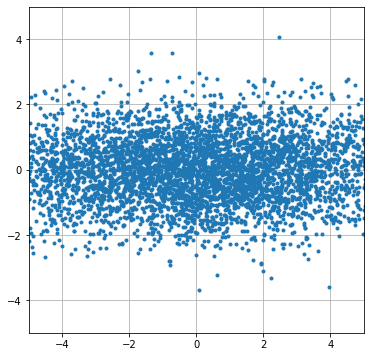

In [47]:
plt.plot(X[:,0],X[:,1],'.')
plt.grid(True)
plt.xlim((-5,5))
plt.ylim((-5,5))
plt.gcf().set_size_inches((6,6))

In [48]:
scipy.linalg.svd(X)

(array([[-1.52391756e-02,  1.47592447e-02, -8.39738910e-03, ...,
          9.23376599e-03, -1.96206588e-02,  8.05230012e-03],
        [ 3.91149442e-03, -2.16215545e-02,  2.37245735e-02, ...,
         -8.72010152e-03, -6.32090682e-03,  1.36703836e-02],
        [-8.06734583e-03,  2.38373492e-02,  9.99383151e-01, ...,
          2.75504795e-04, -9.09625881e-06, -2.53146207e-04],
        ...,
        [ 9.11245232e-03, -8.84747420e-03,  2.77012430e-04, ...,
          9.99843032e-01,  1.22296307e-04,  4.39655220e-05],
        [-1.97085762e-02, -6.04544089e-03, -1.44569979e-05, ...,
          1.24668354e-04,  9.99579460e-01,  2.41959729e-04],
        [ 8.24246579e-03,  1.35551869e-02, -2.49984651e-04, ...,
          4.19347567e-05,  2.44206322e-04,  9.99751212e-01]]),
 array([224.5494761 ,  70.11495803]),
 array([[ 0.99994016,  0.0109401 ],
        [-0.0109401 ,  0.99994016]]))

In [49]:
X2=X+np.array([-200,-50])

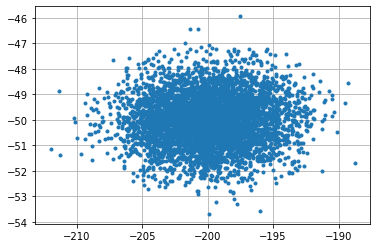

In [50]:
plt.plot(X2[:,0],X2[:,1],'.')
plt.grid(True)

In [51]:
scipy.linalg.svd(X2)

(array([[-1.43561412e-02,  2.09950471e-02, -1.50828284e-02, ...,
         -1.35571569e-02, -1.46923707e-02, -1.42023551e-02],
        [-1.41097328e-02, -1.95428500e-02,  2.33325615e-02, ...,
         -1.30444430e-02,  6.64746491e-03,  5.28015169e-03],
        [-1.42385347e-02,  2.38580411e-02,  9.99244334e-01, ...,
          1.06003360e-04, -3.64894545e-04, -3.26279899e-04],
        ...,
        [-1.40175389e-02, -1.25461836e-02,  8.86180308e-05, ...,
          9.99650839e-01, -1.16393517e-04, -1.26953100e-04],
        [-1.44463310e-02,  7.17160095e-03, -3.73113259e-04, ...,
         -1.06845619e-04,  9.99744579e-01, -2.39206191e-04],
        [-1.40055835e-02,  5.78768028e-03, -3.34810002e-04, ...,
         -1.18249913e-04, -2.39776532e-04,  9.99774373e-01]]),
 array([14575.22169436,    85.81073855]),
 array([[ 0.97014089,  0.24254208],
        [-0.24254208,  0.97014089]]))